In [1]:
# import the cv2 library
import cv2
 
#Reading image from local filesystem
img = cv2.imread('/home/sumit/Downloads/cat.jpg')

In [2]:
#Assign to variables for further use
height, width, channels = img.shape

#Accessing properties of image
img.shape

(959, 640, 3)

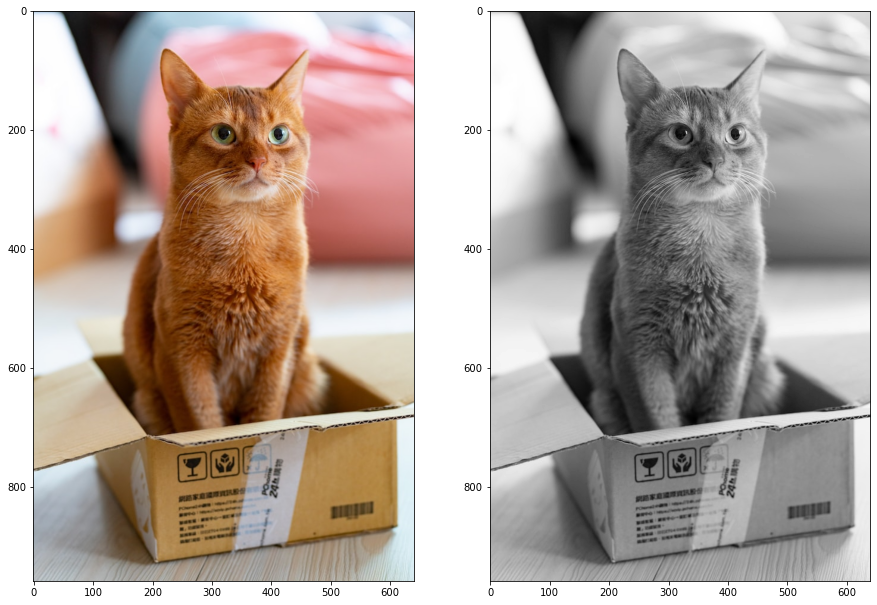

In [3]:
'''
#Display image with cv2 - Checked

cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyWindow('Image')

#Display image with matplotlib
'''
from matplotlib import pyplot as plt

color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(color)
#plt.title('in color')
#plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray)
#plt.title('in gray')
#plt.show()

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(1,2)
ax[0].imshow(color)
ax[1].imshow(gray,cmap='gray')

In [4]:
#Resized view of image
resized = cv2.resize(color, (320,480))
resized.shape

(480, 320, 3)

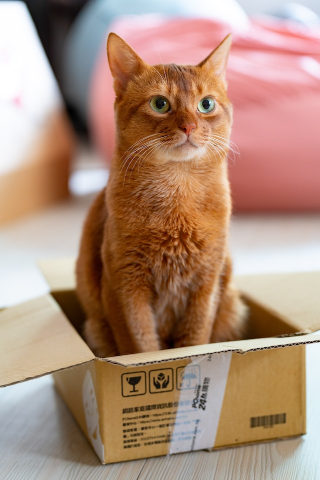

In [5]:
#Display image with Pillow
from PIL import Image

imgp = cv2.cvtColor(resized, cv2.COLOR_RGBA2RGB)
display(Image.fromarray(imgp))

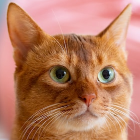

(140, 140, 3)

In [6]:
#Cropping resized image

cropped = resized[30:170, 100:240]
display(Image.fromarray(cropped))
cropped.shape

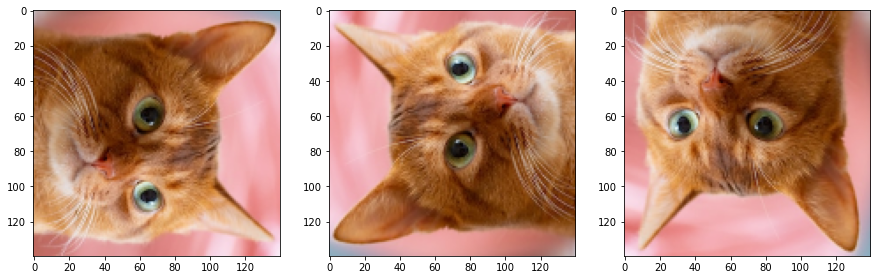

In [7]:
rotated90 = cv2.rotate(cropped, cv2.ROTATE_90_CLOCKWISE)
rotatedn90 = cv2.rotate(cropped, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated180 = cv2.rotate(cropped, cv2.ROTATE_180)

fig, ax = plt.subplots(1,3)
ax[0].imshow(rotated90)
ax[1].imshow(rotatedn90)
ax[2].imshow(rotated180)

warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])

The following are the arguments of the function:

src: the source mage
M: the transformation matrix
dsize: size of the output image
dst: the output image
flags: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
borderMode: the pixel extrapolation method
borderValue: the value to be used in case of a constant border, has a default value of 0

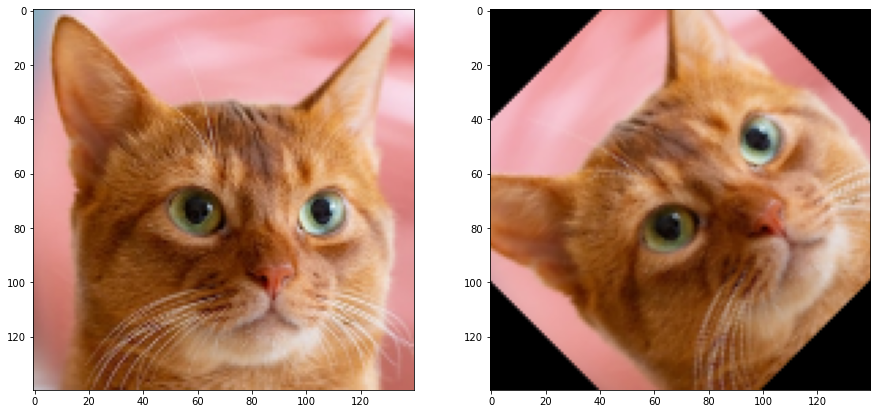

In [8]:
# dividing height and width by 2 to get the center of the image
height, width = cropped.shape[:2]
# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)
 
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
 
# rotate the image using cv2.warpAffine

rotated_image = cv2.warpAffine(src=cropped, M=rotate_matrix, dsize=(width, height))

fig, ax = plt.subplots(1,2)
ax[0].imshow(cropped)
ax[1].imshow(rotated_image)

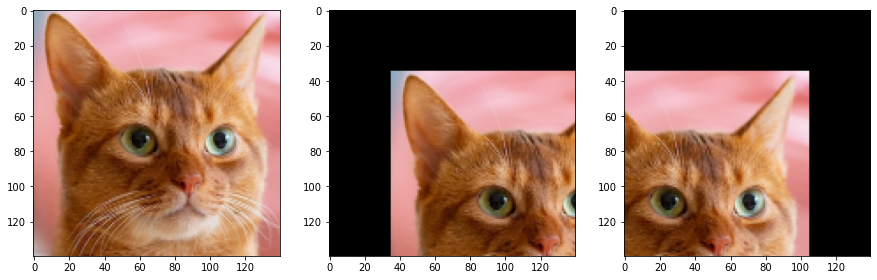

In [9]:
import numpy as np

# get the width and height of the image
height, width = cropped.shape[:2]

# get tx and ty values for translation
# you can specify any value of your choice
#tx,ty = width/4, height/4
#Here tx,ty values are 35,35
 
# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix1 = np.array([[1, 0, 35],[0, 1, 35]], dtype=np.float32)
translation_matrix2 = np.array([[1, 0, -35],[0, 1, 35]], dtype=np.float32)
#translation_matrix3 = np.array([[1, 0, 35],[0, 1, -35]], dtype=np.float32)
#translation_matrix4 = np.array([[1, 0, -35],[0, 1, -35]], dtype=np.float32)

# apply the translation to the image
translated_image1 = cv2.warpAffine(src=cropped, M=translation_matrix1, dsize=(width, height))
translated_image2 = cv2.warpAffine(src=cropped, M=translation_matrix2, dsize=(width, height))
#translated_image3 = cv2.warpAffine(src=cropped, M=translation_matrix2, dsize=(width, height))
#translated_image4 = cv2.warpAffine(src=cropped, M=translation_matrix2, dsize=(width, height))

fig, ax = plt.subplots(1,3)
ax[0].imshow(cropped)
ax[1].imshow(translated_image1)
ax[2].imshow(translated_image2)
#ax[3].imshow(translated_image3)
#ax[4].imshow(translated_image4)

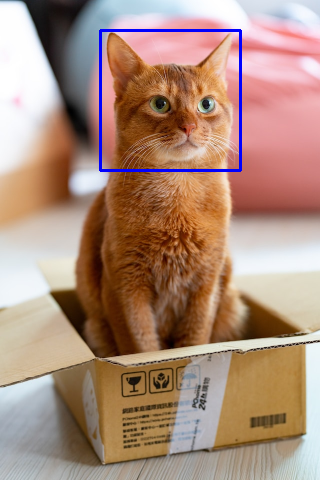

In [10]:
# make a copy of the original image
imgtoann = imgp.copy()

# define the starting and end points of the rectangle
start_point =(100,30)
end_point =(240,170)

# draw the rectangle
annot = cv2.rectangle(imgtoann, start_point, end_point, (0, 0, 255), thickness= 2, lineType=cv2.LINE_8) 
display(Image.fromarray(annot))

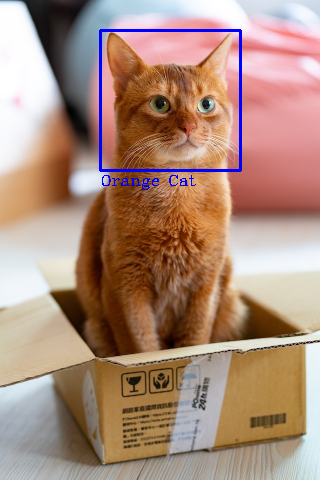

In [11]:
#adding text on the image
text = 'Orange Cat'
#org: Where you want to put the text
org = (100,185)

# write the text on the input image
withtext = cv2.putText(annot, text, org, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.5, color = (0,0,255))
display(Image.fromarray(withtext))

#This is done just for drawing rectangular bounding box shape and adding text to the image and not the best way to annotate images for any type of training.

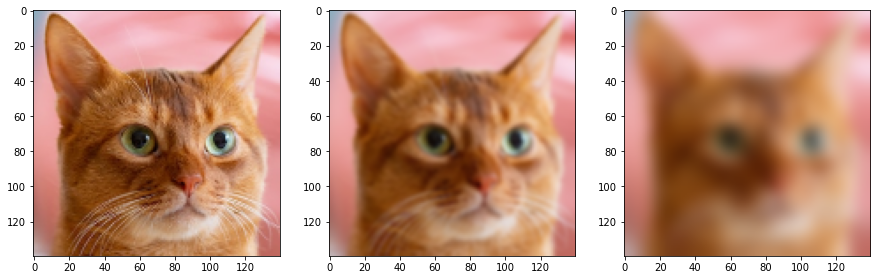

In [12]:
#Apply Blur Filter on image
blur1 = cv2.GaussianBlur(cropped, (5,5), 0)
#display(Image.fromarray(blur))
blur2 = cv2.GaussianBlur(cropped, (25,25), 0)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cropped)
ax[1].imshow(blur1)
ax[2].imshow(blur2)

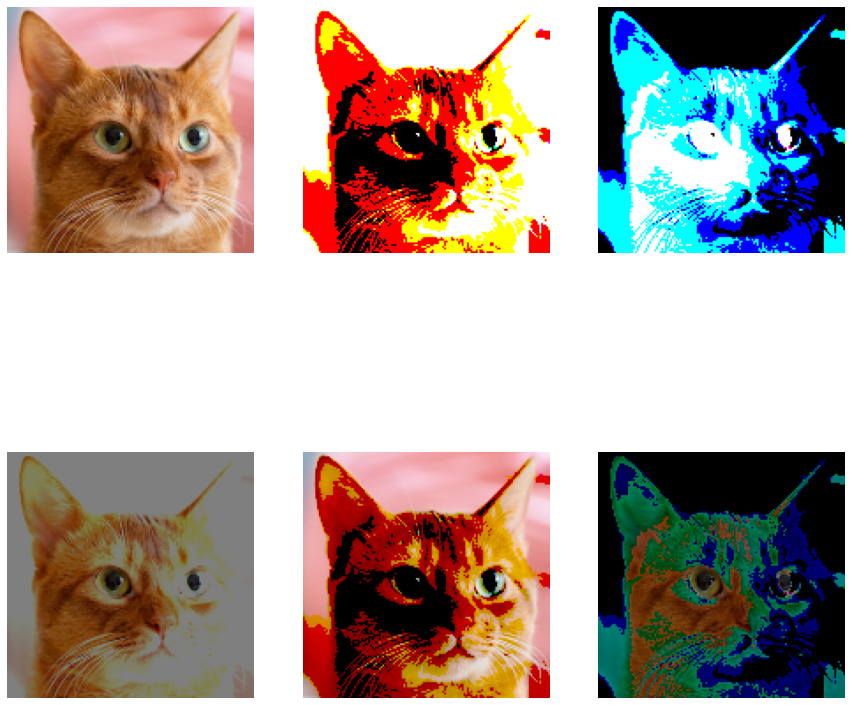

In [13]:
#Image Thresholding
ret, thresh1 = cv2.threshold(cropped, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(cropped, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(cropped, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(cropped, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(cropped, 127, 255, cv2.THRESH_TOZERO_INV)

fig, ax = plt.subplots(2,3)

ax[0][0].imshow(cropped)
ax[0][1].imshow(thresh1)
ax[0][2].imshow(thresh2)
ax[1][0].imshow(thresh3)
ax[1][1].imshow(thresh4)
ax[1][2].imshow(thresh5)

for ax in ax.ravel():
    ax.set_axis_off()
    
plt.show()

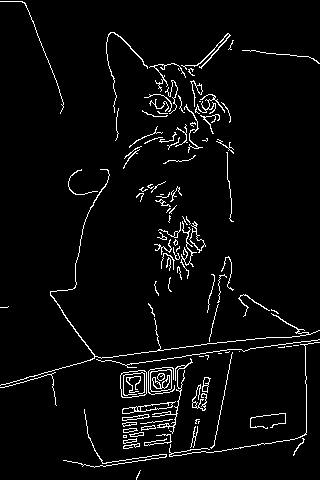

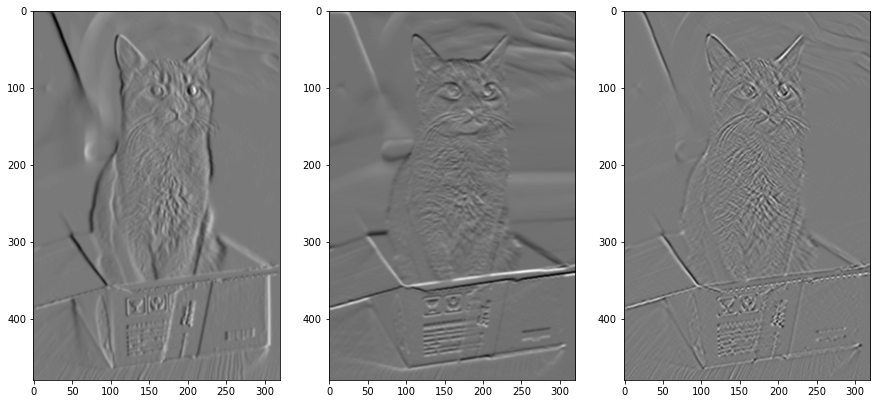

In [14]:
#Edge Detection with CV2 using Sobel Edge Detection and Canny Edge Detection

pic1 = imgp.copy()

# Convert to graycsale
img_gray = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
display(Image.fromarray(edges))

fig, ax = plt.subplots(1,3)
ax[0].imshow(sobelx,cmap='gray')
ax[1].imshow(sobely,cmap='gray')
ax[2].imshow(sobelxy,cmap='gray')

In [15]:
desk = cv2.imread('/home/sumit/Downloads/desk.jpg')
desk = cv2.resize(desk,(460, 682))

cropped = desk[150:600, 40:420]

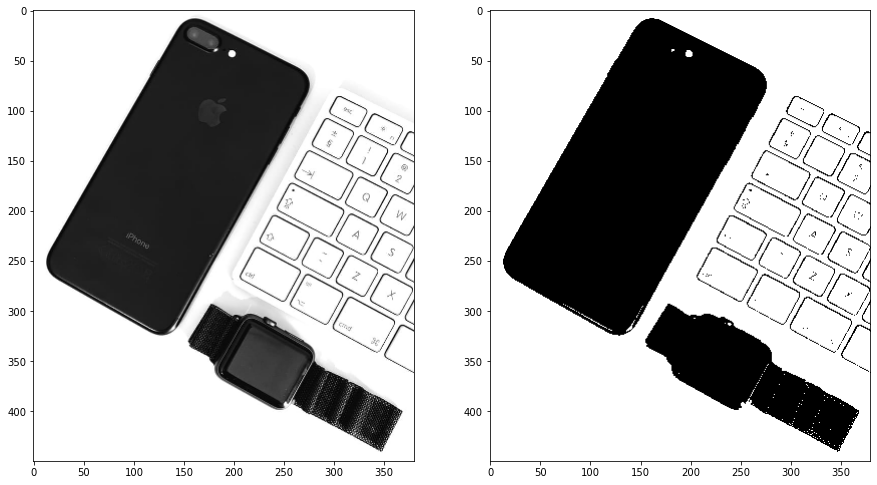

In [16]:
# convert the image to grayscale format
desk_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(desk_gray, 150, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cropped)
ax[1].imshow(thresh,cmap='gray')

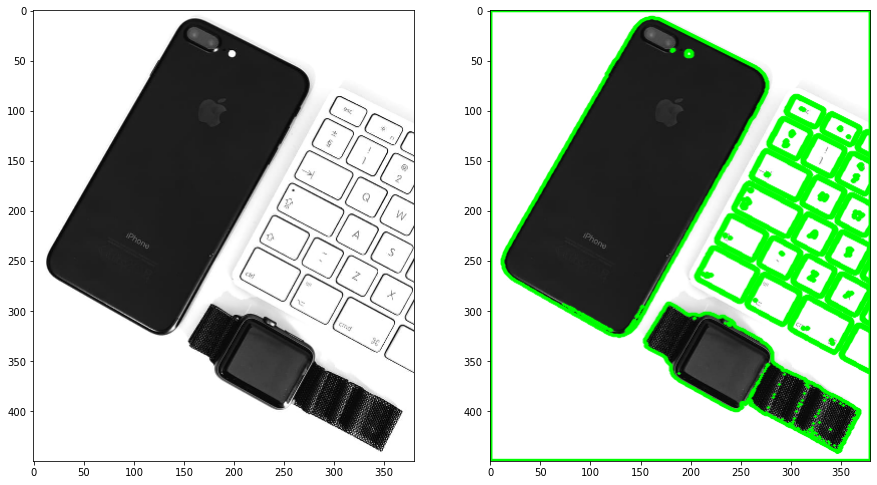

In [17]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = cropped.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cropped)
ax[1].imshow(image_copy)

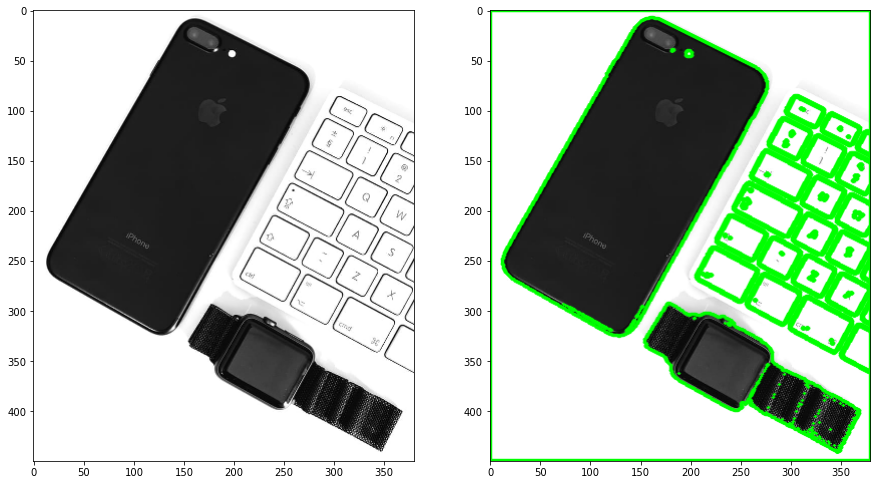

In [18]:
# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = cropped.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cropped)
ax[1].imshow(image_copy1)

The only difference here is that we specify the method for findContours() as CHAIN_APPROX_SIMPLE instead of CHAIN_APPROX_NONE. There are almost no differences between the outputs of CHAIN_APPROX_NONE and CHAIN_APPROX_SIMPLE.

the drawContours() function automatically connects adjacent points, joining them even if they are not in the contours list.

CHAIN_APPROX_SIMPLE is faster than the CHAIN_APPROX_NONE because the algorithm does not store all the points, uses less memory, and therefore, takes less time to execute.